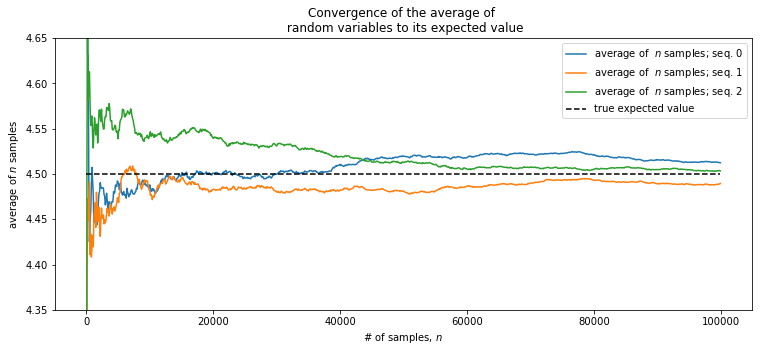

In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12.5, 5)
import pymc as pm

sample_size = 100000
expected_value = lambda_ = 4.5
poi = pm.rpoisson
N_samples = range(1, sample_size, 100)

for k in range(3):

    samples = poi(lambda_, size=sample_size)

    partial_average = [samples[:i].mean() for i in N_samples]

    plt.plot(N_samples, partial_average, lw=1.5, label="average \
of  $n$ samples; seq. %d" % k)


plt.plot(N_samples, expected_value * np.ones_like(partial_average),
         ls="--", label="true expected value", c="k")

plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random variables to its \
expected value")
plt.ylabel("average of $n$ samples")
plt.xlabel("# of samples, $n$")
plt.legend();

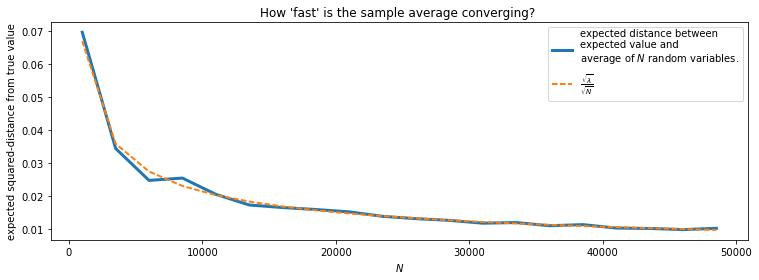

In [2]:
figsize(12.5, 4)

N_Y = 250  # use this many to approximate D(N)
N_array = np.arange(1000, 50000, 2500)  # use this many samples in the approx. to the variance.
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_  # for X ~ Poi(lambda) , E[ X ] = lambda


def D_N(n):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value) ** 2).mean())


for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)


plt.xlabel("$N$")
plt.ylabel("expected squared-distance from true value")
plt.plot(N_array, D_N_results, lw=3,
         label="expected distance between\n\
expected value and \naverage of $N$ random variables.")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title("How 'fast' is the sample average converging? ");

In [3]:
import pymc as pm
N = 10000
print(np.mean([pm.rexponential(0.5) > 10 for i in range(N)]))

0.0067


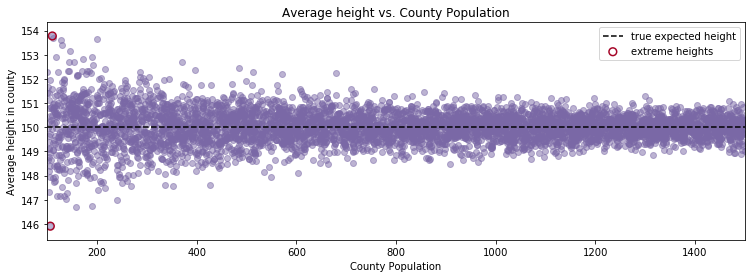

In [4]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

# generate some artificial population numbers
population = pop_generator(100, 1500, size=n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    # generate some individuals and take the mean
    average_across_county[i] = norm(mean_height, 1. / std_height ** 2,
                                    size=population[i]).mean()

# located the counties with the apparently most extreme average heights.
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

# plot population size vs. recorded average
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
            [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="extreme heights")

plt.xlim(100, 1500)
plt.title("Average height vs. County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot([100, 1500], [150, 150], color="k", label="true expected \
height", ls="--")
plt.legend(scatterpoints=1);

In [5]:
print("Population sizes of 10 'shortest' counties: ")
print(population[np.argsort(average_across_county)[:10]])
print("\nPopulation sizes of 10 'tallest' counties: ")
print(population[np.argsort(-average_across_county)[:10]])

Population sizes of 10 'shortest' counties: 
[106 157 190 239 138 133 120 126 140 104]

Population sizes of 10 'tallest' counties: 
[110 112 200 127 129 146 117 189 172 154]
